In [80]:
#import python packages/libraries 
%matplotlib inline
import pandas as pd #pandas
import numpy as np #numpy
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn
import plotly.express as px #plotly
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree

from sklearn.datasets import make_classification
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

color = sns.color_palette()

from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

In [2]:
#read data from csv file and convert to data frame
df_loan_dataset = pd.read_csv('/Users/liamoleary/GitHub/Data/lending_club_loan_dataset.csv')

#print top 2 lines of dataframe 
print(df_loan_dataset.head(5))

         id grade  annual_inc  short_emp  emp_length_num home_ownership  \
0  11454641     A      100000          1               1           RENT   
1   9604874     A       83000          0               4            OWN   
2   9684700     D       78000          0              11       MORTGAGE   
3   9695736     D       37536          0               6       MORTGAGE   
4   9795013     D       65000          0              11       MORTGAGE   

     dti             purpose        term  last_delinq_none  \
0  26.27         credit_card   36 months                 1   
1   5.39         credit_card   36 months                 0   
2  18.45  debt_consolidation   60 months                 1   
3  12.28             medical   60 months                 0   
4  11.26  debt_consolidation   36 months                 0   

   last_major_derog_none  revol_util  total_rec_late_fee  od_ratio  bad_loan  
0                    NaN        43.2                 0.0  0.160624         0  
1                 

In [3]:
#information on dataset - number of records, non-null columns and data types
print(df_loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [4]:
#shape of the dataset - rows and columns 
print(df_loan_dataset.shape)

(20000, 15)


In [5]:
#remove duplicates (if any)
df_loan_dataset_1 = df_loan_dataset.drop_duplicates(keep='first')
print(df_loan_dataset_1.shape)

# same result as previous dataset which indicates there are no duplicates in our dataset 

(20000, 15)


In [6]:
#summary statistics for dataset (numeric variables) - count, mean, standard deviation, min, max and 25, 50 and 75th percentiles 
df_loan_dataset.describe().round(1)


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,20000.0,20000.0,20000.0,20000.0,19846.0,20000.0,574.0,20000.0,20000.0,20000.0,20000.0
mean,7590662.1,73349.6,0.1,6.8,16.6,0.5,0.8,56.0,0.3,0.5,0.2
std,1609593.3,45198.6,0.3,3.8,7.6,0.5,0.4,42.1,3.1,0.3,0.4
min,586040.0,8412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6206282.8,47000.0,0.0,3.0,10.9,0.0,1.0,38.8,0.0,0.3,0.0
50%,7378896.5,65000.0,0.0,7.0,16.2,1.0,1.0,57.1,0.0,0.5,0.0
75%,8766234.8,88000.0,0.0,11.0,22.1,1.0,1.0,73.9,0.0,0.8,0.0
max,11454641.0,1000000.0,1.0,11.0,35.0,1.0,1.0,5010.0,96.5,1.0,1.0


In [7]:
#count the number of unique values 
df_loan_dataset.nunique()   

id                       20000
grade                        7
annual_inc                2566
short_emp                    2
emp_length_num              12
home_ownership               3
dti                       3295
purpose                     12
term                         3
last_delinq_none             2
last_major_derog_none        2
revol_util                1030
total_rec_late_fee         166
od_ratio                 20000
bad_loan                     2
dtype: int64

In [8]:
#looking at the count of unique values there are some values we would like to explore further to ensure they contain reasonable values:
df_loan_dataset['last_delinq_none'].unique()
 

array([1, 0])

In [9]:
# missing values - for all variables 
missing_values = df_loan_dataset.isnull().sum().to_frame().rename(columns={0:"absolute"})
missing_values["percent"] = (missing_values.apply(lambda x: x/x.sum())*100).round(2)
missing_values

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


In [10]:
# summary of characteristics of non-numeric variables
df_loan_dataset.describe(include=[np.object])

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_7150/297930248.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_loan_dataset.describe(include=[np.object])


,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


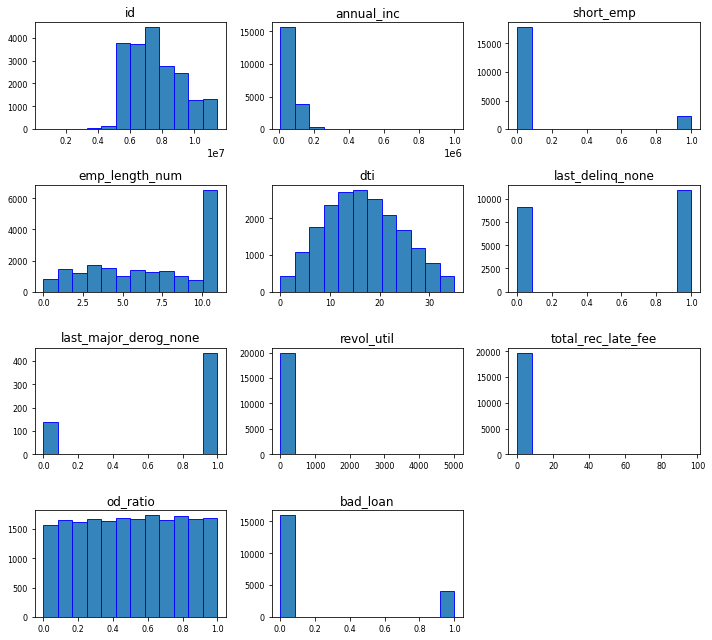

In [11]:
#histogram for numerical values 
df_loan_dataset.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

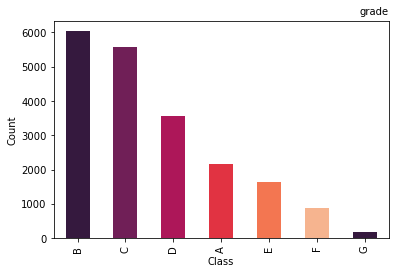

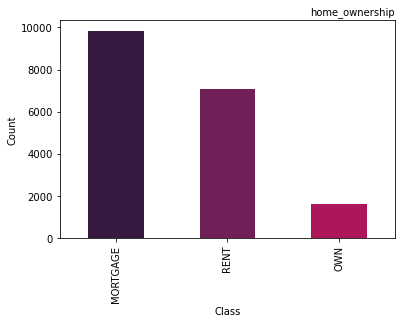

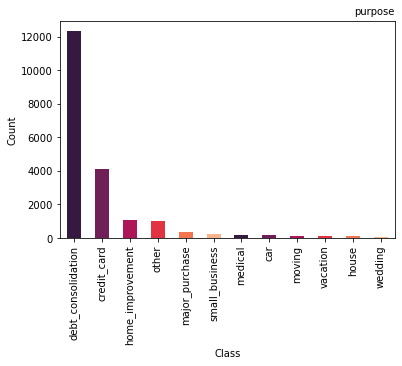

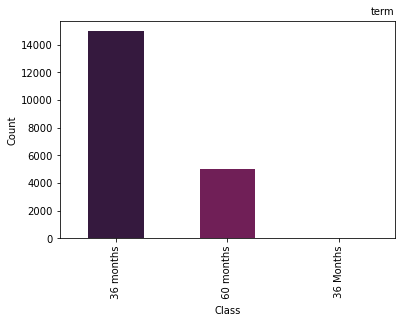

In [12]:
#bar charrts for categorical values
for col in df_loan_dataset.select_dtypes(include=["object"]).columns:
    df_loan_dataset[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [ ]:
sns.pairplot(df_loan_dataset, hue="id", height=3)

In [13]:
#correlation of variables 
df_loan_dataset.corr().round(2)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.00,0.02,0.02,0.00,0.01,-0.03,-0.05,-0.01,-0.01,0.00,-0.04
annual_inc,0.02,1.00,-0.10,0.12,-0.23,-0.08,0.02,0.02,0.01,-0.00,-0.09
short_emp,0.02,-0.10,1.00,-0.58,0.00,0.03,0.07,-0.01,0.01,-0.01,0.04
emp_length_num,0.00,0.12,-0.58,1.00,0.01,-0.05,-0.16,0.03,-0.01,0.00,-0.04
dti,0.01,-0.23,0.00,0.01,1.00,0.03,0.00,0.10,0.01,0.01,0.14
last_delinq_none,-0.03,-0.08,0.03,-0.05,0.03,1.00,0.60,0.01,-0.01,-0.00,0.02
last_major_derog_none,-0.05,0.02,0.07,-0.16,0.00,0.60,1.00,-0.03,-0.09,0.05,-0.01
revol_util,-0.01,0.02,-0.01,0.03,0.10,0.01,-0.03,1.00,0.01,-0.01,0.05
total_rec_late_fee,-0.01,0.01,0.01,-0.01,0.01,-0.01,-0.09,0.01,1.00,-0.00,0.13
od_ratio,0.00,-0.00,-0.01,0.00,0.01,-0.00,0.05,-0.01,-0.00,1.00,0.00


In [14]:
#heatmap showing the correlation of all variables 
heatmap = px.imshow(df_loan_dataset.corr())
heatmap.show()


/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py

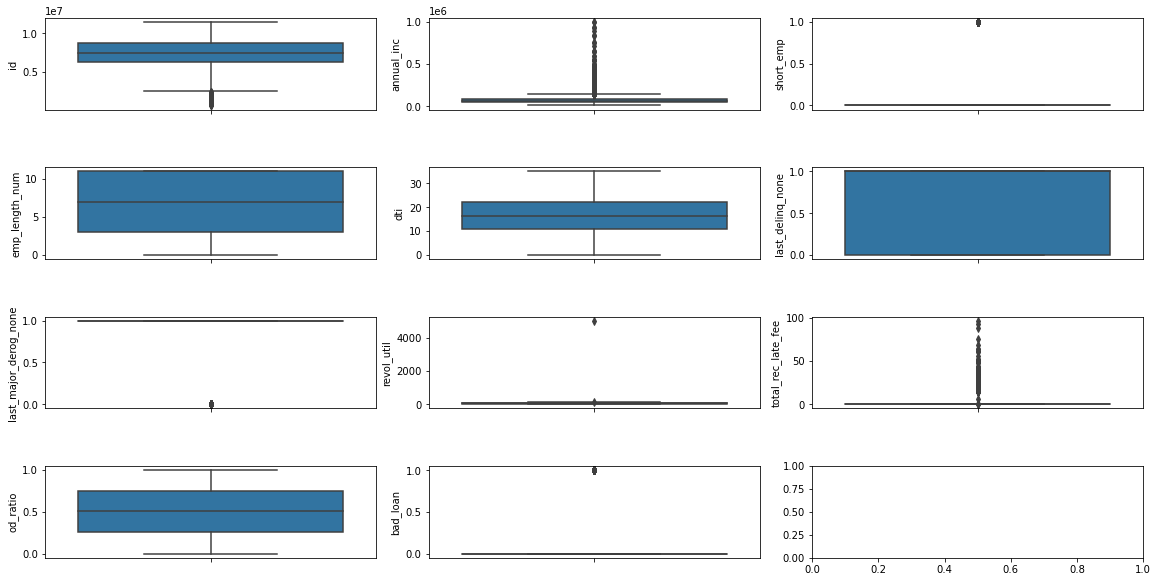

In [15]:
#detect outliers 
data_numercial = df_loan_dataset.select_dtypes(exclude=["object","category"]).copy()

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_numercial.items():
    sns.boxplot(y=k, data=data_numercial, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

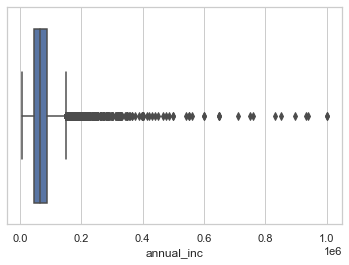

In [16]:
#want to drill down further on annual_inc to detect outliers
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset['annual_inc'])

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

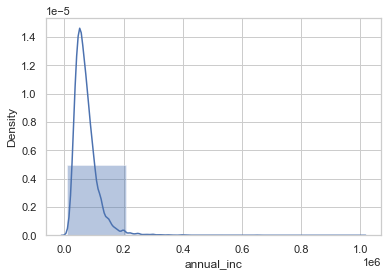

In [17]:
#probability density function - annual inc
sns.distplot(df_loan_dataset['annual_inc'],bins=5)

In [18]:
#removing value greater than 200000 for the annual_inc column 
df_loan_dataset1 = df_loan_dataset[df_loan_dataset.annual_inc < 200000]



In [19]:
#looking at the maximum value in the annual_inc column to ensure the data has been removed 
df_loan_dataset1['annual_inc'].max()

199597

In [20]:
#performing a quick count to ensure values have been removed 
df_loan_dataset1['annual_inc'].count()

19650

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

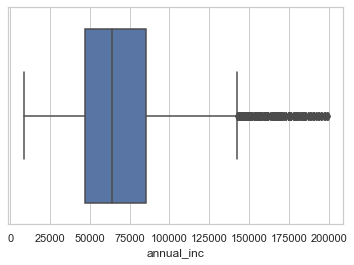

In [21]:
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset1['annual_inc'])

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='revol_util'>

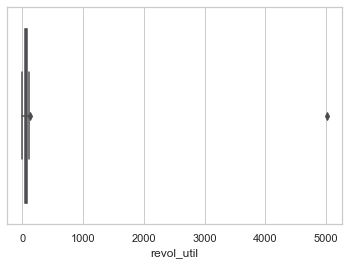

In [22]:
#want to drill down further on revol_util to detect outliers
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset1['revol_util'])

In [23]:
#as per the box plot, we can see the outlier to the right. Looking at the maximum value to idenitfy its value 
df_loan_dataset1['revol_util'].max()


5010.0

In [24]:
#removing the value 5010.0 from the dataset
df_loan_dataset2 = df_loan_dataset1[df_loan_dataset1.revol_util != 5010.0]

In [25]:
#making sure there aren't any other outlier values 
df_loan_dataset2['revol_util'].max()

128.1

In [26]:
#removing the other value which we have identified as an outlier 
df_loan_dataset3 = df_loan_dataset2[df_loan_dataset2.revol_util != 128.1]

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='revol_util'>

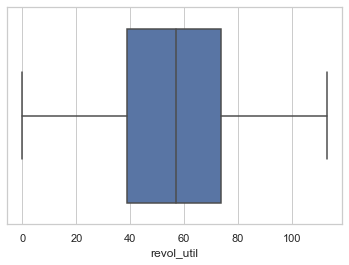

In [27]:
#sns.set_theme(style="whitegrid")
#sns.boxplot(df_loan_dataset_2['revol_util'])

sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset3['revol_util'])

In [ ]:
df_loan_dataset3['bad_loan'].value_counts()


In [ ]:
df_loan_dataset3['last_major_derog_none'].value_counts()

In [ ]:
df_loan_dataset3['last_delinq_none'].value_counts()

In [ ]:
df_loan_dataset3['short_emp'].value_counts()

In [29]:
#missing Values
print(df_loan_dataset3.isna().sum())  

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1469
dti                        152
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19080
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64


In [30]:
#replace missing values - home_ownership (mode imputation)
df_loan_dataset3["home_ownership"] = df_loan_dataset3.home_ownership.fillna(df_loan_dataset3.home_ownership.value_counts().index[0])

df_loan_dataset3.home_ownership.value_counts(dropna=False)

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_7150/4127133876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MORTGAGE    11080
RENT         6985
OWN          1583
Name: home_ownership, dtype: int64

In [31]:
#replace missing values - dti (mean)
df_loan_dataset3["dti"] = df_loan_dataset3.dti.fillna(df_loan_dataset3.dti.mean())

df_loan_dataset3.dti.value_counts(dropna=False)

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_7150/2528799242.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16.70749    152
19.64000     20
15.87000     20
11.45000     19
19.25000     19
           ... 
2.32000       1
34.98000      1
33.44000      1
2.63000       1
32.53000      1
Name: dti, Length: 3293, dtype: int64

In [32]:
#replace missing values - last_major_derog_none (remove)
df_loan_dataset3.drop("last_major_derog_none", axis=1, inplace=True)


/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_7150/2460903156.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_loan_dataset3['annual_inc'] = df_loan_dataset3.annual_inc.fillna(df_loan_dataset3.annual_inc.mean())

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_7150/1065586536.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
#showing that all missing values have been removed or dealt with
print(df_loan_dataset3.isna().sum())

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64


In [41]:
#split the data into numeric 
data_num1 = df_loan_dataset3.select_dtypes(exclude=["object","category"]).copy()
print(data_num1)


             id  annual_inc  short_emp  emp_length_num    dti  \
0      11454641      100000          1               1  26.27   
1       9604874       83000          0               4   5.39   
2       9684700       78000          0              11  18.45   
3       9695736       37536          0               6  12.28   
4       9795013       65000          0              11  11.26   
...         ...         ...        ...             ...    ...   
19995   6595657       27000          0               9  18.36   
19996   1576331       45000          0               2  23.22   
19997   6645736      104000          0               5  13.27   
19998   6625736       38400          0               2  12.84   
19999   6625685      150000          0              11   2.20   

       last_delinq_none  revol_util  total_rec_late_fee  od_ratio  bad_loan  
0                     1        43.2                 0.0  0.160624         0  
1                     0        21.5                 0.0  0.8107

In [39]:
#split the data into categorical
data_cat = df_loan_dataset3.select_dtypes(exclude=["int64","float64"]).copy()
print(data_cat)

      grade home_ownership             purpose        term
0         A           RENT         credit_card   36 months
1         A            OWN         credit_card   36 months
2         D       MORTGAGE  debt_consolidation   60 months
3         D       MORTGAGE             medical   60 months
4         D       MORTGAGE  debt_consolidation   36 months
...     ...            ...                 ...         ...
19995     B           RENT  debt_consolidation   36 months
19996     B       MORTGAGE      major_purchase   36 months
19997     B       MORTGAGE  debt_consolidation   36 months
19998     A       MORTGAGE  debt_consolidation   36 months
19999     B       MORTGAGE         credit_card   36 months

[19648 rows x 4 columns]


In [42]:
#Feature Selection 
X = data_num1.iloc[:,0:20]  #independent columns
y = data_num1.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Must pass 2-d input. shape=()

In [43]:
#take a copy of our dataset 
data_1 = df_loan_dataset3.copy()
#drop the id column as it is an unecessary feature in our model. From our test on categorical features, we will drop od_ratio
data_2 = data_1.drop(columns=['id','od_ratio']).copy()

In [44]:

data_cat['target'] = df_loan_dataset3.bad_loan
data_cat.dropna(how="any", inplace=True)

ydata_cat = data_cat.target
data_cat.drop("target", axis=1, inplace=True)

In [45]:
for col in data_cat.columns:
    table = pd.crosstab(data_cat[col], ydata_cat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
grade,,
A,1971,122
B,5200,759
C,4318,1161
D,2526,967
E,1079,533
F,505,345
G,101,61


p-value: 0.0000000000000000000000000



target,0,1
home_ownership,,
MORTGAGE,9117,1963
OWN,1269,314
RENT,5314,1671


p-value: 0.0000000000000000000000466



target,0,1
purpose,,
car,135,30
credit_card,3394,693
debt_consolidation,9702,2454
home_improvement,841,204
house,80,15
major_purchase,279,84
medical,129,37
moving,92,30
other,731,271


p-value: 0.0000000000000104754118564



target,0,1
term,,
36 Months,26,5
36 months,12207,2503
60 months,3467,1440


p-value: 0.0000000000000000000000000


In [46]:
#Encoding and Transformations 

#Variable - Grade
data_2["grade"] = data_2.grade.map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

#Variables - Term, Home Ownership and Purpose 
data_2 = pd.get_dummies(data_2, columns =["term", "home_ownership", "purpose"])


In [47]:
print(data_2.head(5))

   grade  annual_inc  short_emp  emp_length_num    dti  last_delinq_none  \
0      7      100000          1               1  26.27                 1   
1      7       83000          0               4   5.39                 0   
2      4       78000          0              11  18.45                 1   
3      4       37536          0               6  12.28                 0   
4      4       65000          0              11  11.26                 0   

   revol_util  total_rec_late_fee  bad_loan  term_ 36 Months  ...  \
0        43.2                 0.0         0                0  ...   
1        21.5                 0.0         0                0  ...   
2        46.3                 0.0         1                0  ...   
3        10.7                 0.0         1                0  ...   
4        15.2                 0.0         0                0  ...   

   purpose_debt_consolidation  purpose_home_improvement  purpose_house  \
0                           0                         

In [57]:
#Machine Learning - Predictive Modelling 

#ROC Curve - Area Under the Curve 
##Creating a Dataset
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [52]:
%matplotlib
seed = 42
# Making a copy of the dataset
df_lr = data_2.copy()

# Dividing the dataset into training (80%) and testing (20%)
train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.2, random_state = seed)
X_train_lr = train_set_lr.drop(['bad_loan'], axis = 1)
y_train_lr = train_set_lr['bad_loan']
X_test_lr = test_set_lr.drop(['bad_loan'], axis = 1)
y_test_lr = test_set_lr['bad_loan']

# Normalizing the train and test data
scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns
X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)



Using matplotlib backend: MacOSX


0.715701392046279


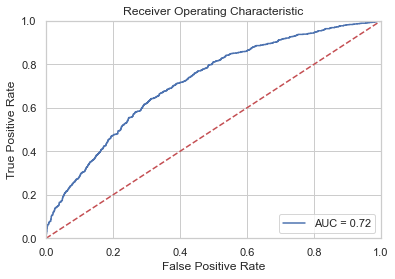

CPU times: user 6.44 s, sys: 140 ms, total: 6.58 s
Wall time: 4.04 s


In [60]:
%%time
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_lr, y_train_lr)


clf_lr

clf_lr.best_estimator_


y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]

auc_roc_plot(y_test_lr, y_preds_lr)

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



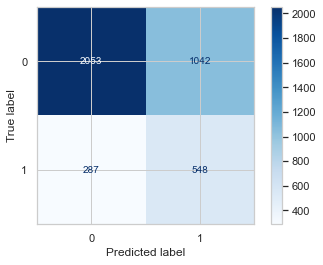

In [64]:
plot_confusion_matrix(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

In [66]:
# Making a copy of the dataset
df_nn = data_2.copy()

# Dividing the dataset in train (80%) and test (20%)
train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)
X_train_nn = train_set_nn.drop(['bad_loan'], axis = 1)
y_train_nn = train_set_nn['bad_loan']
X_test_nn = test_set_nn.drop(['bad_loan'], axis = 1)
y_test_nn = test_set_nn['bad_loan']

# Normalization of the train and test data
scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns
X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)
X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)


0.7153933812504233


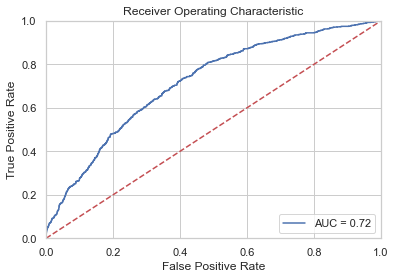

CPU times: user 9min 59s, sys: 9.13 s, total: 10min 8s
Wall time: 5min 56s


In [69]:
%%time
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)


y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]

auc_roc_plot(y_test_nn, y_preds_nn)

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



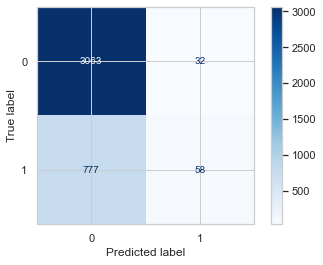

In [71]:
# Confusion Matrix display
plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues")

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_nn == 1, y_preds_nn > 0.5).ravel()
tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

In [78]:

# Making a copy of the dataset
df_trees = data_2.copy()

# Dividing the dataset in train (80%) and test (20%)
train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)
X_train_dt = train_set_dt.drop(['bad_loan'], axis = 1)
y_train_dt = train_set_dt['bad_loan']
X_test_dt = test_set_dt.drop(['bad_loan'], axis = 1)
y_test_dt = test_set_dt['bad_loan']



In [81]:
%%time
clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 10).fit(X_train_dt, y_train_dt)

clf_tree.score(X_test_dt, y_test_dt)

# Visualizing variables by importance
important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

CPU times: user 89.9 ms, sys: 5.78 ms, total: 95.7 ms
Wall time: 113 ms


,value
grade,0.232512
dti,0.202772
annual_inc,0.174761
revol_util,0.144591
total_rec_late_fee,0.090027
emp_length_num,0.039965
term_ 60 months,0.029768
last_delinq_none,0.014856
home_ownership_RENT,0.010104
purpose_major_purchase,0.008837


0.6487785011560079


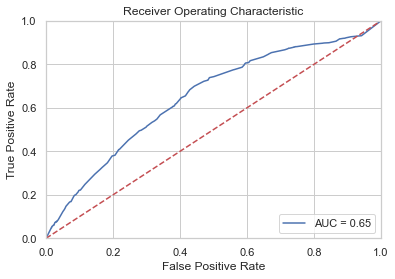

In [82]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]

auc_roc_plot(y_test_dt, y_preds_dt)

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



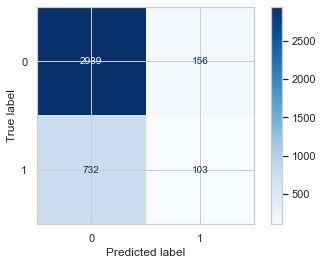

In [90]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");

# Creating assignments Final Results
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()
tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt = tp

In [92]:
# Creating performance table
#aucroclr = 5.333
#aucrocdt = 6.555
#aucrocnn = 72.666


results_1 = {'Classifier': ['AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
'Logistic Regression (LR)': [aucroclr, (tn_lr/3956*100).round(3), (fp_lr/3956*100).round(2), (fn_lr/3956*100).round(2), (tp_lr/3956*100).round(2)],
'Decision Trees (DT)': [aucrocdt, (tn_dt/3956*100).round(3), (fp_dt/3956*100).round(2), (fn_dt/3956*100).round(2),(tp_dt/3956*100).round(2)],
'Neural Networks (NN)': [aucrocnn, (tn_nn/3956*100).round(3), (fp_nn/3956*100).round(2),(fn_nn/3956*100).round(2),(tp_nn/3956*100).round(2)]}

df1 = pd.DataFrame(results_1, columns = ['Classifier', 'Logistic Regression (LR)', 'Decision Trees (DT)', 'Neural Networks (NN)'])
df1.set_index("Classifier", inplace=True)
results = df1.T
results

Classifier,AUC ROC (%),TN (%),FP (%),FN (%),TP (%)
Logistic Regression (LR),5.333,51.896,26.34,7.25,13.85
Decision Trees (DT),6.555,74.292,3.94,18.50,2.60
Neural Networks (NN),72.666,77.427,0.81,19.64,1.47


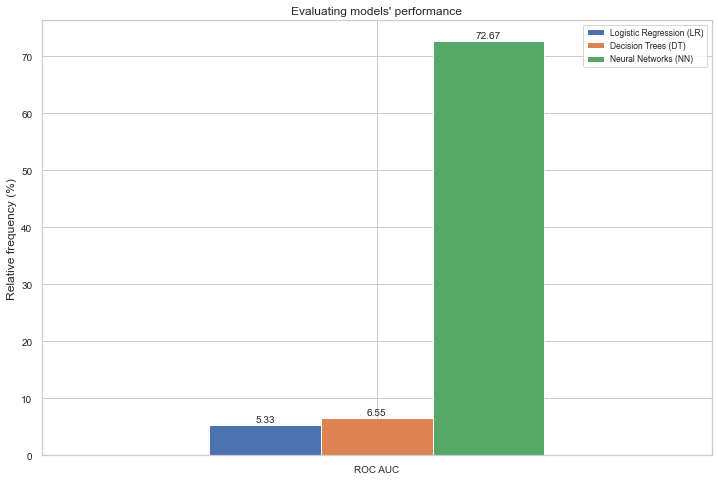

In [94]:

results_2 = {'Classifier': ['ROC AUC'], 'Logistic Regression (LR)': [aucroclr], 'Decision Trees (DT)': [aucrocdt], 'Neural Networks (NN)': [aucrocnn]}
df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)', 'Decision Trees (DT)', 'Neural Networks (NN)'])
df2.set_index("Classifier", inplace=True)
results_2 = df2

# Display tHe graph
ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), figsize=(12,8) ,fontsize=10, grid=True)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(fontsize=8.5, loc="upper right")
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Relative frequency (%)')
plt.show()